# Introduction

In [1]:
#Here are the basic libraries I use for analysis
#If any further libraries are needed I will import them separately

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Weekly Ultrasound Interest Over Time

The first dataset we will review is the weekly interest in search term "ultrasound" on Google from 2017-2020. Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term. Here is a more in-depth breakdown of how Google Trends are calculated: https://support.google.com/trends/answer/4365533?hl=en

In [2]:
#Here I am importing the dataset into Jupyter Notebook
#I am indexing the 'Week' column and I am parsing the dates
#Both of these actions will help in time series analysis

ultrasound = pd.read_csv('Weekly_Ultrasound_Interest.csv', index_col = 'Week', parse_dates = ['Week'])

In [3]:
#Here are the first few rows of data in the dataset

ultrasound.head()

,Weekly_Interest
Week,
2017-01-01,88
2017-01-08,96
2017-01-15,95
2017-01-22,96
2017-01-29,99


In [4]:
#Here are the last few rows in the dataset

ultrasound.tail()

,Weekly_Interest
Week,
2020-11-29,84
2020-12-06,90
2020-12-13,85
2020-12-20,67
2020-12-27,76


In [5]:
#There are 209 rows (weeks) of data included in this dataset

ultrasound.shape

(209, 1)

In [6]:
#Here are some basic statistics from all of the dataset, not broken down by any time variable

#The max is 100 and the min is 60, which means Google has enough ultrasound data to document the trend in searches

#The average level of interest is 88, I am not sure if that's considered high yet

ultrasound.describe()

,Weekly_Interest
count,209.000000
mean,87.545455
std,7.965013
min,60.000000
25%,84.000000
50%,89.000000
75%,93.000000
max,100.000000


# Basic Data Visualization

I am going to begin with simply plotting the raw time series data

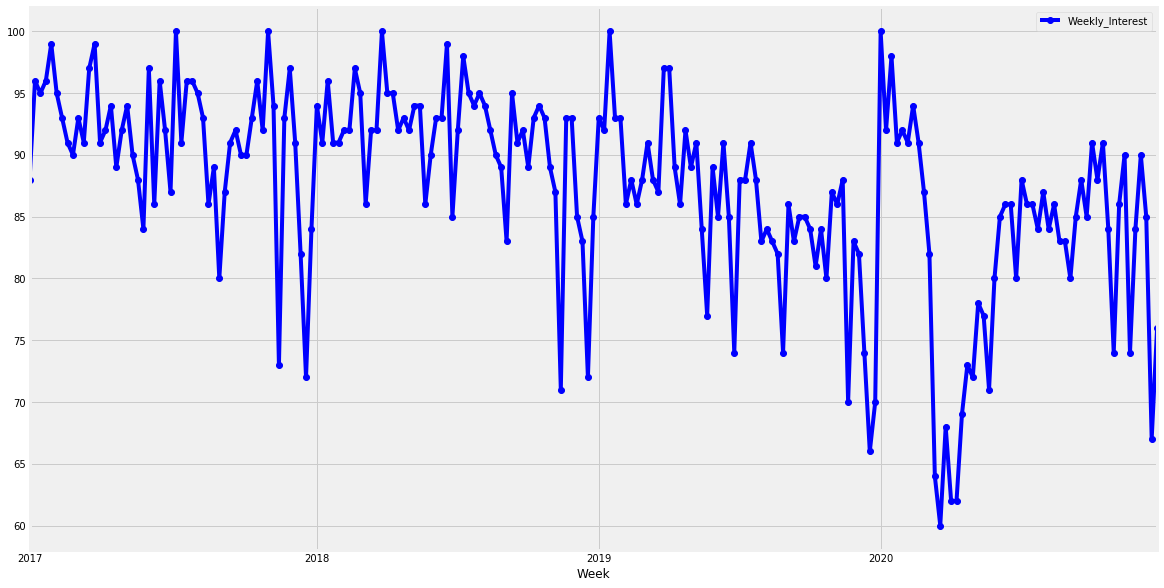

In [7]:
#This makes a 1x1 subplot with a 18x10 size in Jupyter
fig, ax = plt.subplots(1,1, figsize = (18,10))

#Here we are plotting weekly ultrasound interest in Google Trends from 2017-2020
ultrasound.plot(ax=ax, marker='o', linestyle = '-', color = 'blue')

#### Brief Observations

The lowest point on the chart was during the beginning of the COVID-19 pandemic. There seems to be a consistent drop in interest at the end of the year, and then a spike at the beginning of the year. I wonder if there is any reason for that.

#### Plotting Summary Statistics of the Time Series Data

Text(0.5, 0, 'Month')

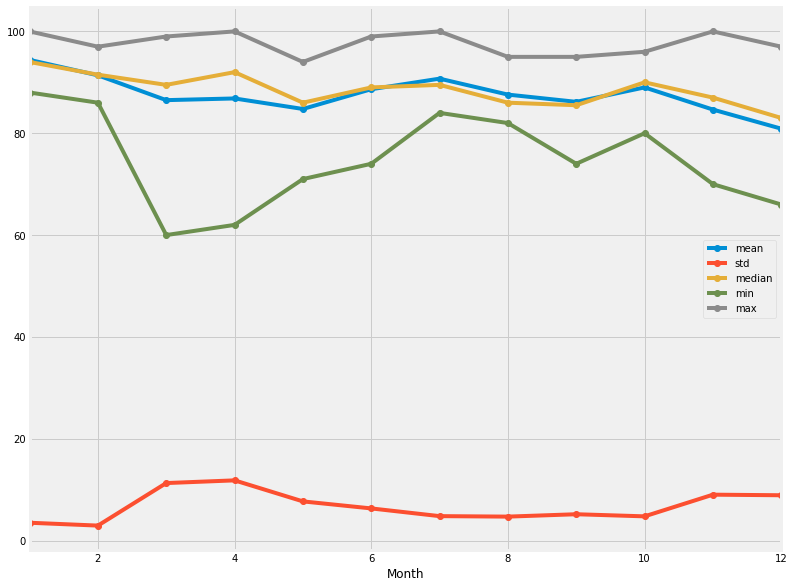

In [8]:
#Here we are plotting summary statistics of the weekly interest in search term "ultrasound"

#This is broken down by MONTH

fig, ax = plt.subplots(1,1, figsize = (12,10))

(ultrasound
.assign(month = lambda df: df.index.month)
.groupby('month')['Weekly_Interest'].agg(['mean', 'std', 'median', 'min', 'max'])
.plot(ax = ax, marker = 'o'))

ax.set_xlabel('Month')

#### Brief Observations

It looks like June is the most active month for the search term "ultrasound". It has the highest peak, the highest mean, a high median, and a "high" minimum.

Text(0.5, 0, 'Year')

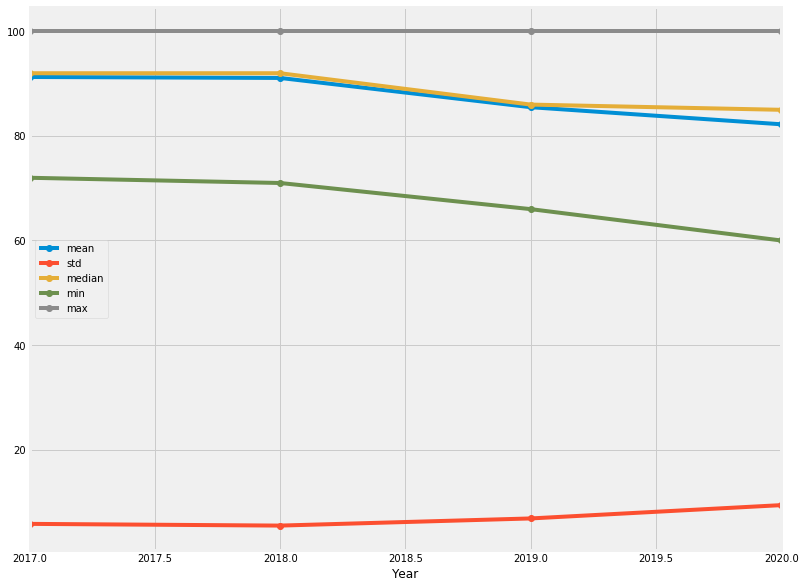

In [9]:
#Here we are plotting summary statistics of the weekly interest in search term "ultrasound"

#This is broken down by YEAR

fig, ax = plt.subplots(1,1, figsize = (12,10))

(ultrasound
.assign(year = lambda df: df.index.year)
.groupby('year')['Weekly_Interest'].agg(['mean', 'std', 'median', 'min', 'max'])
.plot(ax = ax, marker = 'o'))

ax.set_xlabel('Year')

#### Brief Observations

It looks like 2018 was the most active year for the search term "ultrasound". Then it looks like there's a steady decline even before the COVID-19 pandemic.

#### Time Series Adjustments

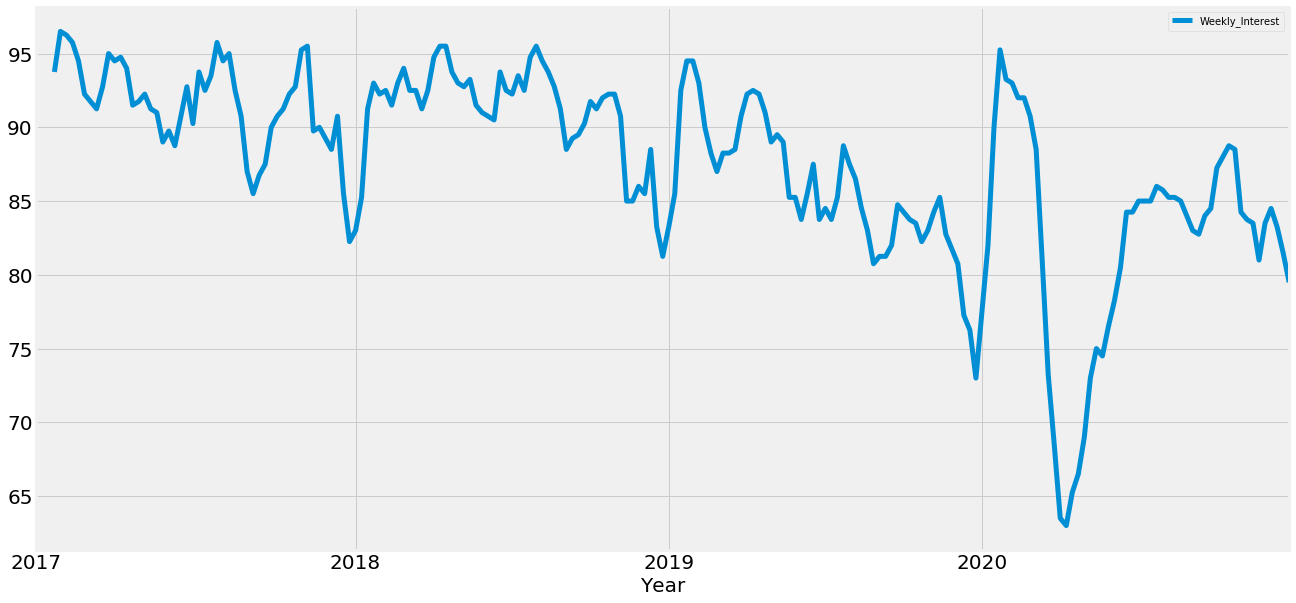

In [10]:
#Rolling averages are a good way to smooth time series data

#For Rolling Averages, for each time point you take the average of the points on either side of it

#We'll start with monthly data (4 weeks = month)

ultrasound.rolling(4).mean().plot(figsize = (20,10), linewidth = 5, fontsize = 20)

plt.xlabel('Year', fontsize = 20);

#### Brief Observations

Once again there is a significant dip in ultrasound interest in the beginning of 2020 due to the coronavirus. There is also a clearer picture of the drop in interest towards the end of the year with a sudden spike right at the turn of the new year.

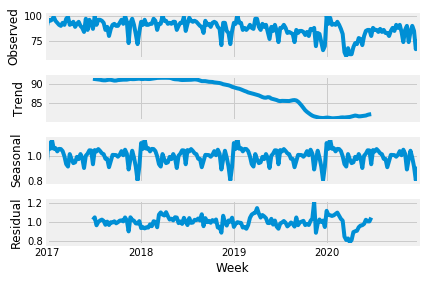

In [11]:
#Time series decomposition is the process of separating time series data into its core components. 

#These components include a potential trend (overall rise or fall in the mean).

#They also include seasonality (a recurring cycle), and the remaining random residual. 

#The residual is what’s left over after trends and seasonality are removed. 

#If the seasonality’s amplitude is independent of the level (average) then you should use the additive model.

#If the seasonality’s amplitude is dependent on the level (average) then you should use the multiplicative model.

#I am not sure if the amplitude is dependent or not, so I will run both models

#I am starting with the multiplicative model


from statsmodels.tsa.seasonal import seasonal_decompose

seasonality = seasonal_decompose(ultrasound, model = 'multiplicative')

seasonality.plot()

plt.show()

#### Brief Observations

To me it looks like there is a clear downward trend in the weekly interest of search term "ultrasound". There is also a clear seasonal pattern where the interest dies at the end of the year, then spikes again right at the beginning.

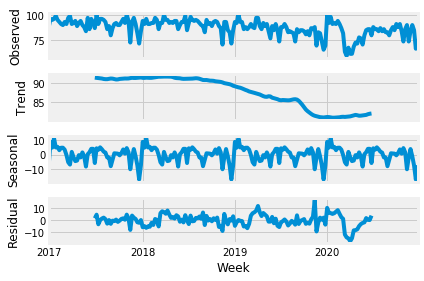

In [12]:
#Here I am running the additive model instead of the multiplicative one

seasonality = seasonal_decompose(ultrasound, model = 'additive')

seasonality.plot()

plt.show()

#### Brief Observations

I do not see a difference between this and the multiplicative model. The same trends and seasonalities are appearing. I consider that a good thing.

#### Is There A Relationship Between Ultrasound Interest and Birth Month?

There seems to be a clear seasonal pattern in ultrasound interest. I am curious if that matches up with a seasonal pattern in births. I gathered total monthly births from 2017-2019 (2020 data not available). All of this data comes from the CDC.

In [13]:
#Here I am importing the dataset into Jupyter notebook

#Like before I am indexing the date column and parsing the dates to make things easier for time series analysis

birth_months = pd.read_csv('total_births_per_month.csv', index_col = 'Date', parse_dates = ['Date'])

In [14]:
#Here are the first few rows of data

birth_months.head()

,Total_Births
Date,
2017-01-01,314587
2017-02-01,290052
2017-03-01,319904
2017-04-01,300729
2017-05-01,323094


In [15]:
#Here are the last few rows of data

birth_months.tail()

,Total_Births
Date,
2019-08-01,342000
2019-09-01,326000
2019-10-01,325000
2019-11-01,298000
2019-12-01,309000


In [16]:
#Here are some summary statistics for the dataset

#The average amount of births per month from 2017-2019 was 316,734

#The fewest in any month was 280,000

#The most in any month was 352,814

birth_months.describe()

,Total_Births
count,36.000000
mean,316733.777778
std,16468.985291
min,280000.000000
25%,307527.250000
50%,316022.000000
75%,326194.500000
max,352914.000000


In [17]:
#We have 36 rows (3 years) of data

birth_months.shape

(36, 1)

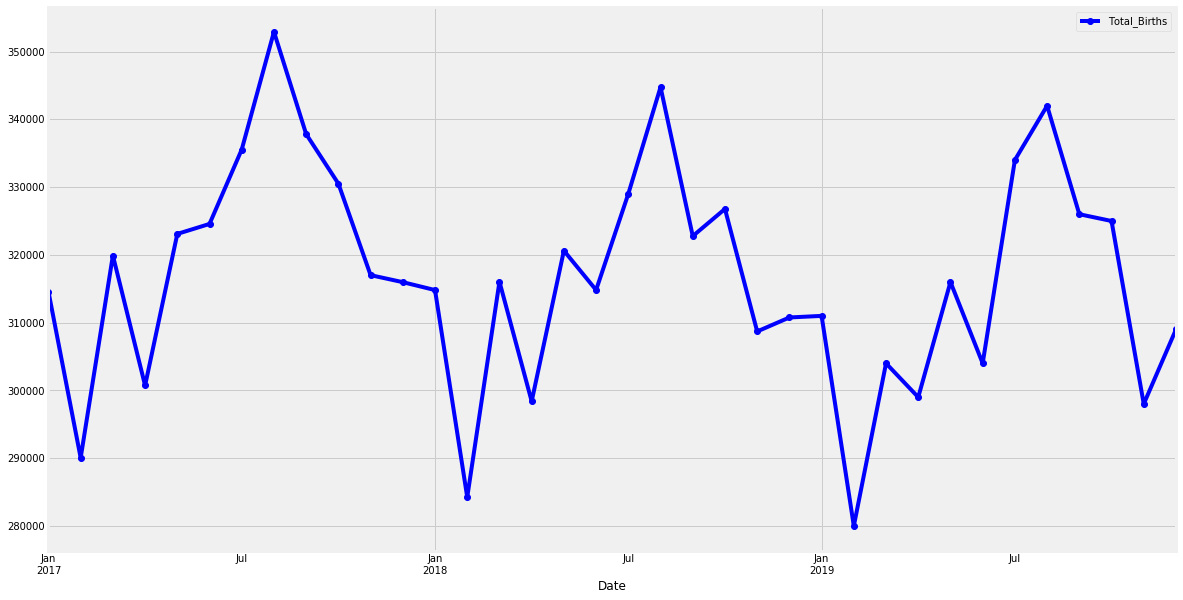

In [18]:
#This makes a 1x1 subplot with a 18x10 size in Jupyter
fig, ax = plt.subplots(1,1, figsize = (18,10))

#Here we are plotting monthly total births in the U.S. from 2017-2019
birth_months.plot(ax=ax, marker='o', linestyle = '-', color = 'blue')

#### Brief Observations

There are clear spikes in births in July of each year and clear drops in births in February of each year. 

# State by State Ultrasound Interest Over Time

The next dataset we will analyze is the interest in search term "ultrasound" broken down by state from 2017-2020. A higher value means a higher proportion of all queries, not a higher absolute query count. So a tiny country where 80% of the queries are for "bananas" will get twice the score of a giant country where only 40% of the queries are for "bananas".

In [19]:
#Here I am importing the dataset into Jupyter notebook

state_ultrasound = pd.read_csv('State_Ultrasound_Interest.csv')

In [20]:
#Here are the first few rows of the dataset

state_ultrasound.head()

,State,Interest,Year
0,WV,100,2017
1,DE,94,2017
2,LA,88,2017
3,TN,86,2017
4,SD,86,2017


In [21]:
#Here are the last few rows of the dataset

state_ultrasound.tail()

,State,Interest,Year
199,WI,64,2020
200,ID,64,2020
201,ME,61,2020
202,VT,55,2020
203,DC,47,2020


In [22]:
#There are 204 rows and three columns worth of data

state_ultrasound.shape

(204, 3)

In [23]:
#Here are some summary statistics covering the entire dataset. It will be better to break these down by state

#The average interest is 74, with a maximum interest of 100 and minimum interest of 40

state_ultrasound.describe()

,Interest,Year
count,204.000000,204.000000
mean,73.549020,2018.500000
std,10.403796,1.120784
min,40.000000,2017.000000
25%,67.000000,2017.750000
50%,73.000000,2018.500000
75%,80.000000,2019.250000
max,100.000000,2020.000000


In [24]:
#Here I am separating the dataset by year
#I am trying to isolate state data per year to make it easier for analysis

df_2017 = state_ultrasound["Year"] == 2017
df_2018 = state_ultrasound["Year"] == 2018
df_2019 = state_ultrasound["Year"] == 2019
df_2020 = state_ultrasound["Year"] == 2020

In [25]:
#Here is state interest in search term "ultrasound" for 2017

state_ultrasound[df_2017]

,State,Interest,Year
0,WV,100,2017
1,DE,94,2017
2,LA,88,2017
3,TN,86,2017
4,SD,86,2017
5,KY,85,2017
6,OK,85,2017
7,ND,83,2017
8,PA,83,2017
9,NV,77,2017


# Basic Data Visualization

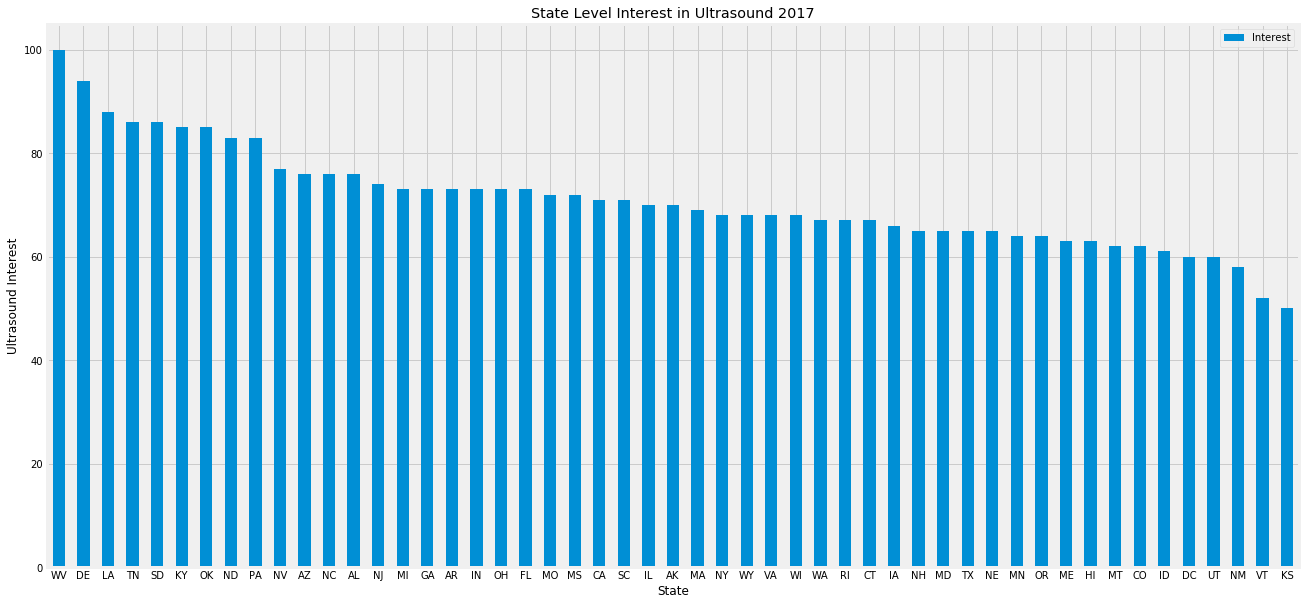

In [26]:
#Here is a bar chart plotting the interest in search term "ultrasound" for all 50 states and DC in 2017

ax = state_ultrasound[df_2017].sort_values('Interest', ascending = False).plot.bar(x='State', y='Interest', rot=0, figsize=(20,10))
plt.ylabel("Ultrasound Interest")
plt.xlabel("State")
plt.title("State Level Interest in Ultrasound 2017");

#### Brief Observations

West Virginia had the highest interest in searching for "ultrasound" on Google with 100 and Kansas had the least interest with 50. I don't see any kind of regional pattern for interest in "ultrasound". Both the states with the most and least interest are spread out.

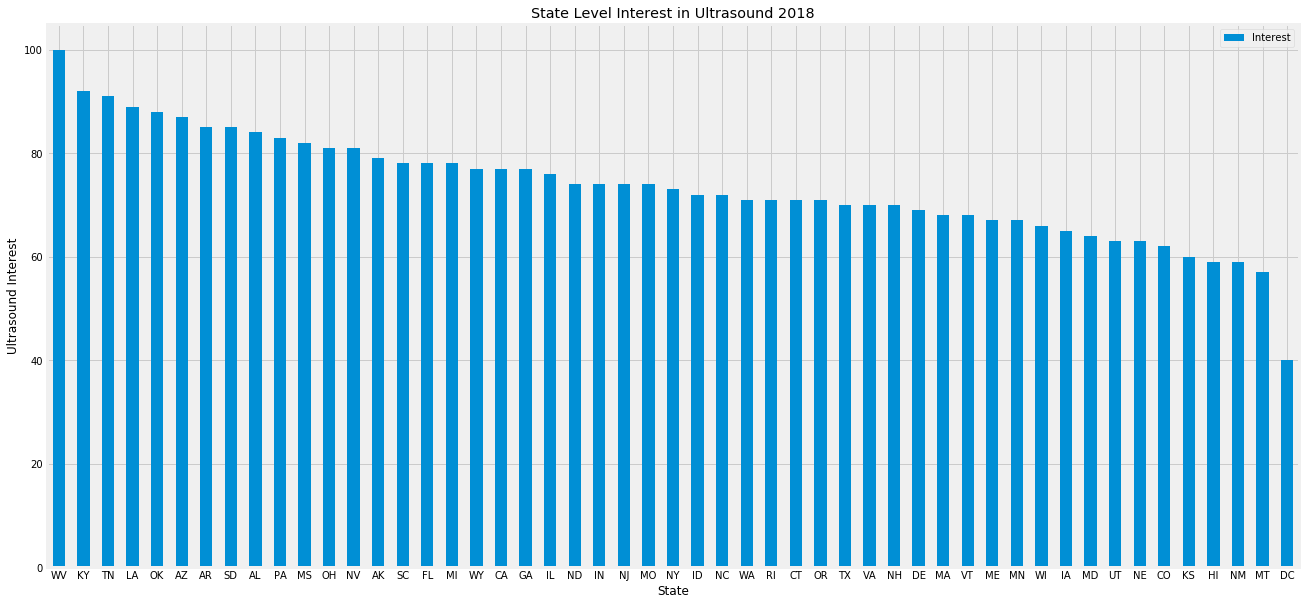

In [27]:
#Here is a bar chart plotting the interest in search term "ultrasound" for all 50 states and DC in 2018

ax = state_ultrasound[df_2018].sort_values('Interest', ascending = False).plot.bar(x='State', y='Interest', rot=0, figsize=(20,10))
plt.ylabel("Ultrasound Interest")
plt.xlabel("State")
plt.title("State Level Interest in Ultrasound 2018");

#### Brief Observations

Once again West Virginia had the highest interest in searching for "ultrasound" on Google. Tennessee and Lousiana remained in the top 5. Washington DC had the lowest amount of interest with 40, which is also the minimum for the entire time frame of 2017-2020.

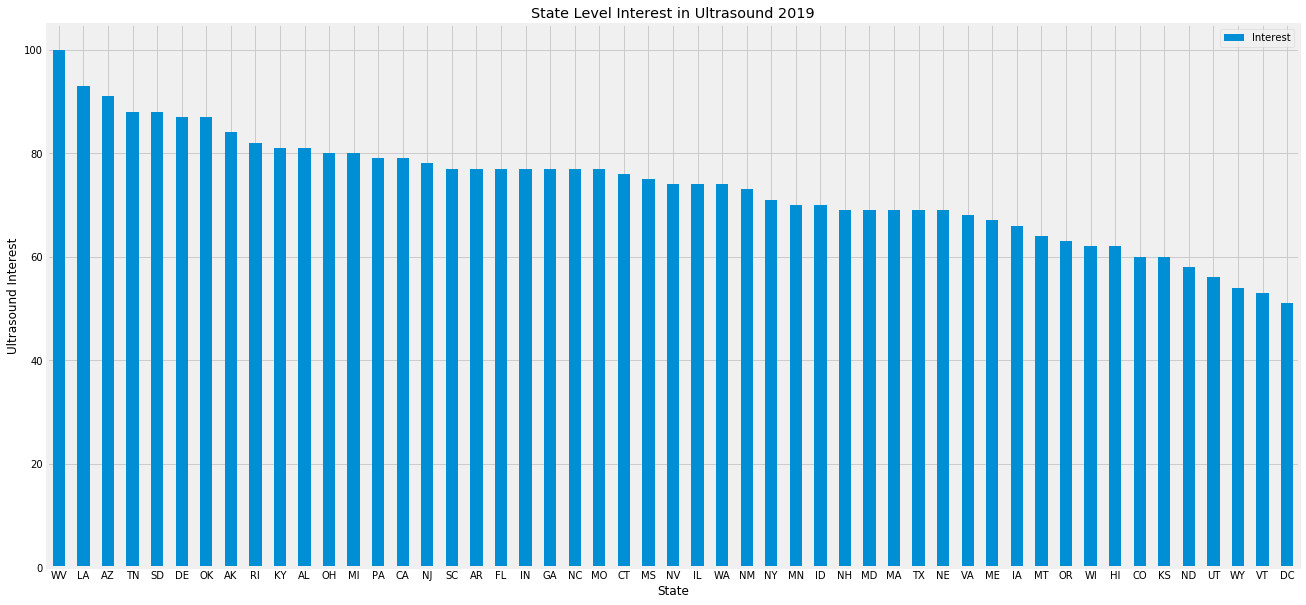

In [28]:
#Here is a bar chart plotting the interest in search term "ultrasound" for all 50 states and DC in 2019

ax = state_ultrasound[df_2019].sort_values('Interest', ascending = False).plot.bar(x='State', y='Interest', rot=0, figsize=(20,10))
plt.ylabel("Ultrasound Interest")
plt.xlabel("State")
plt.title("State Level Interest in Ultrasound 2019");

#### Brief Observations

For the third straight year West Virginia had the highest interest in search term "ultrasound". It could mean nothing, but that is a pattern that needs investigating. LA and TN still remained in the top five, while DC had the least interest for the second year in a row, but was higher than 2018.

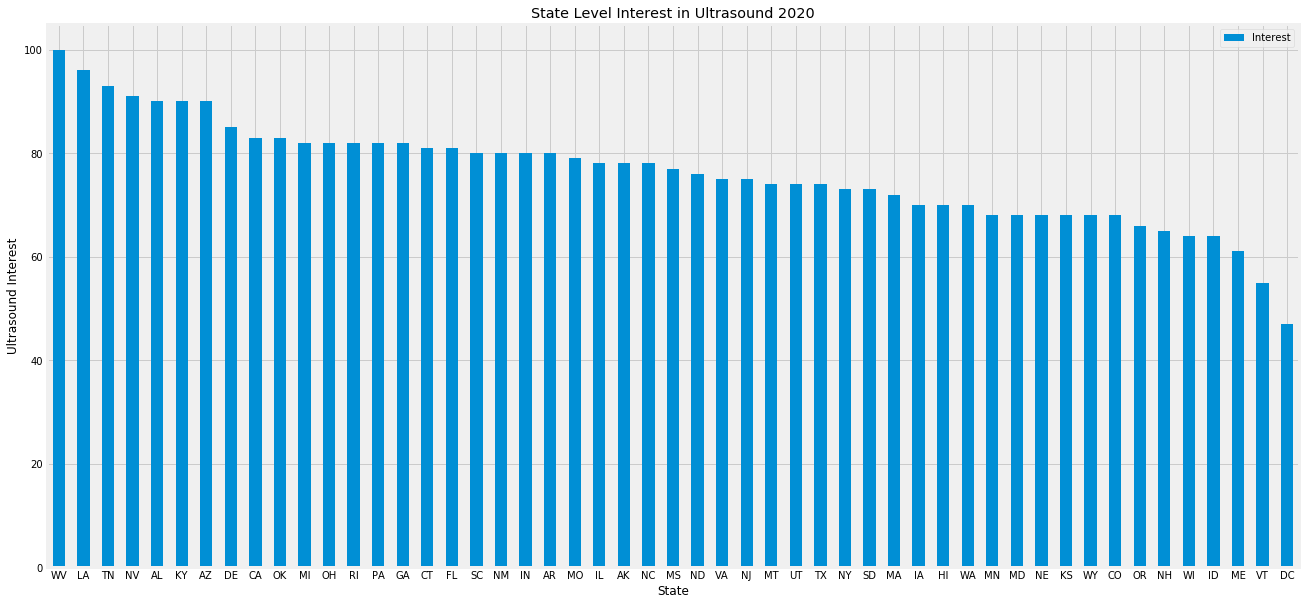

In [29]:
#Here is a bar chart plotting the interest in search term "ultrasound" for all 50 states and DC in 2020

ax = state_ultrasound[df_2020].sort_values('Interest', ascending = False).plot.bar(x='State', y='Interest', rot=0, figsize=(20,10))
plt.ylabel("Ultrasound Interest")
plt.xlabel("State")
plt.title("State Level Interest in Ultrasound 2020");

#### Brief Observations

AGAIN, for the fourth year in a row West Virginia had the highest interest in "ultrasound", while for the third year in a row Washington DC had the least interest.

#### Summarizing States Together from 2017-2020

In [30]:
#Here I am creating a dataset that breaks down summary statistics for each state over the time period 2017-2020

state_summary = state_ultrasound.groupby('State').agg({'Interest': ['mean', 'median', 'min', 'max']})
state_summary.columns = ['state_mean', 'state_median', 'state_min', 'state_max']
print(state_summary)

       state_mean  state_median  state_min  state_max
State                                                
AK          77.75          78.5         70         84
AL          82.75          82.5         76         90
AR          78.75          78.5         73         85
AZ          86.00          88.5         76         91
CA          77.50          78.0         71         83
CO          63.00          62.0         60         68
CT          73.75          73.5         67         81
DC          49.50          49.0         40         60
DE          83.75          86.0         69         94
FL          77.25          77.5         73         81
GA          77.25          77.0         73         82
HI          63.50          62.5         59         70
IA          66.75          66.0         65         70
ID          66.75          67.0         61         72
IL          74.50          75.0         70         78
IN          76.00          75.5         73         80
KS          59.50          6

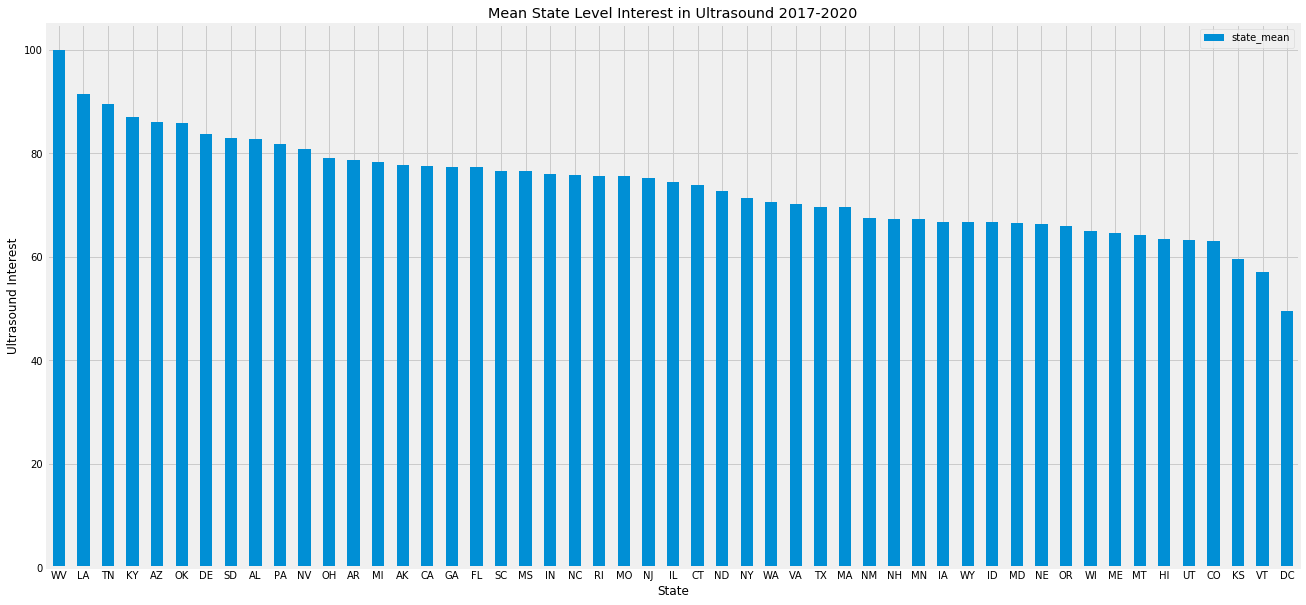

In [31]:
#Here is a bar chart plotting the average interest in search term "ultrasound" for all 50 states and DC from 2017-202

ax = state_summary.sort_values('state_mean', ascending = False).plot.bar(y='state_mean', rot=0, figsize=(20,10))
plt.ylabel("Ultrasound Interest")
plt.xlabel("State")
plt.title("Mean State Level Interest in Ultrasound 2017-2020");

#### Brief Observations

West Virginia had the highest average of interest and Washington DC had the lowest. Both of these findings are not surprising based on the initial analysis above.

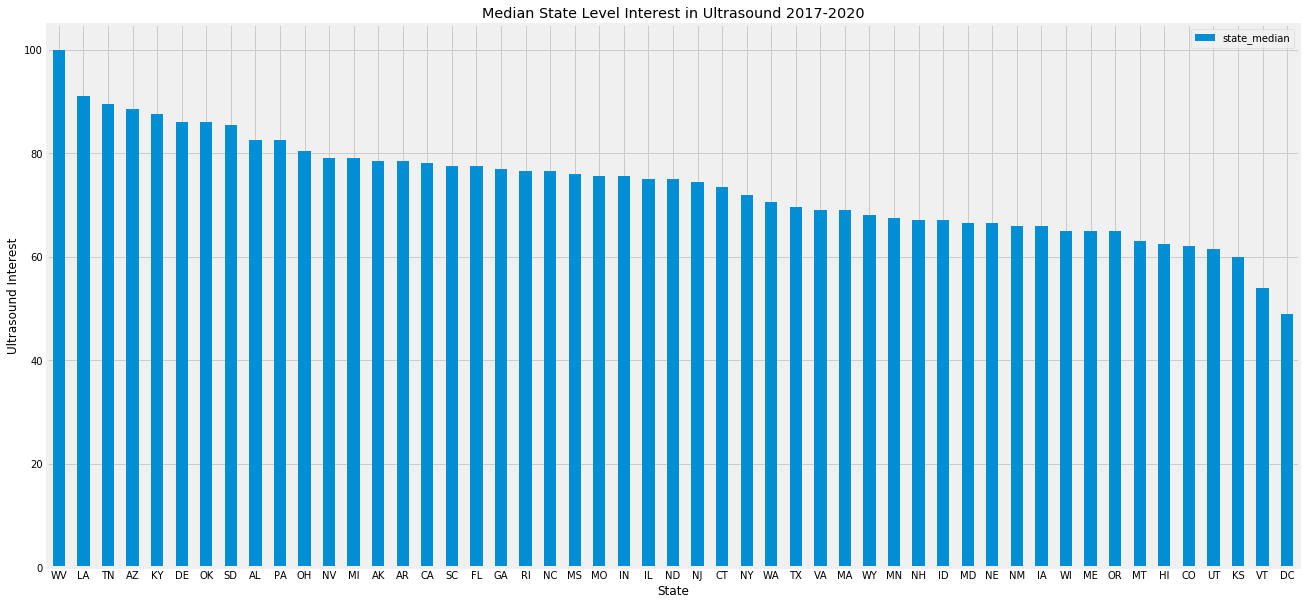

In [32]:
ax = state_summary.sort_values('state_median', ascending = False).plot.bar(y='state_median', rot=0, figsize=(20,10))
plt.ylabel("Ultrasound Interest")
plt.xlabel("State")
plt.title("Median State Level Interest in Ultrasound 2017-2020");

#### Brief Observations

There are small differences between median and mean level interest, but West Virginia still has the highest median and DC still has the lowest median interest.

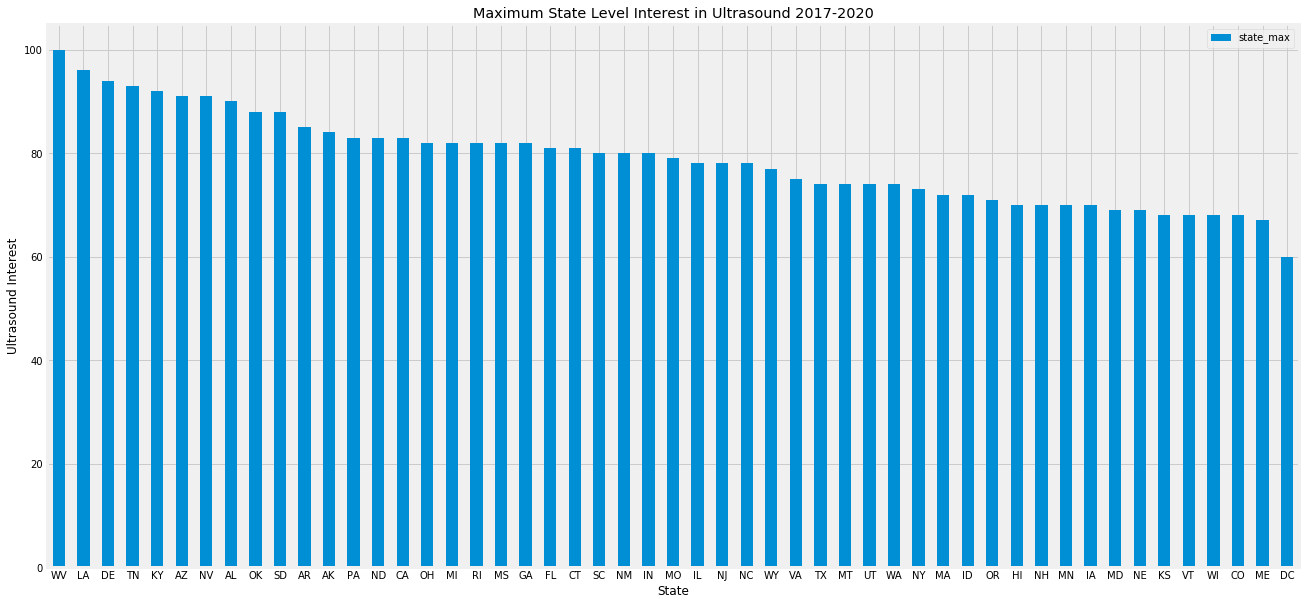

In [33]:
ax = state_summary.sort_values('state_max', ascending = False).plot.bar(y='state_max', rot=0, figsize=(20,10))
plt.ylabel("Ultrasound Interest")
plt.xlabel("State")
plt.title("Maximum State Level Interest in Ultrasound 2017-2020");

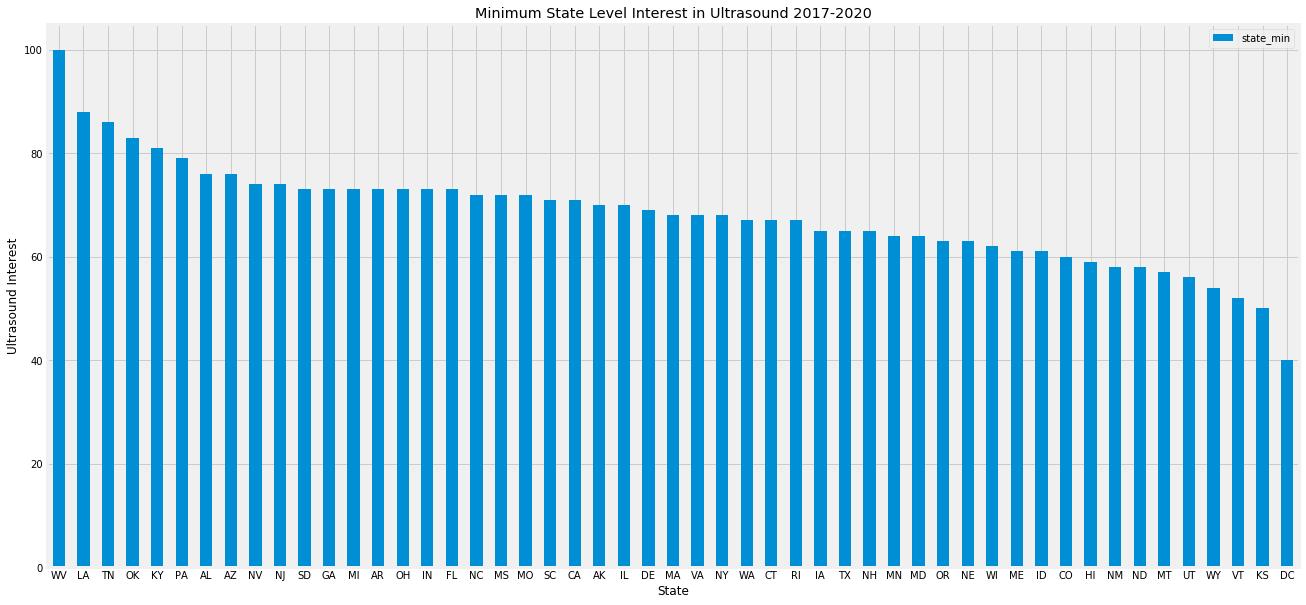

In [34]:
ax = state_summary.sort_values('state_min', ascending = False).plot.bar(y='state_min', rot=0, figsize=(20,10))
plt.ylabel("Ultrasound Interest")
plt.xlabel("State")
plt.title("Minimum State Level Interest in Ultrasound 2017-2020");

#### Is There a Relationship Between State Ultrasound Interest and State Fertility Rate?

I wanted to investigate whether there was a relationship between state interest in the search term "ultrasound" and the fertility rate of that state. The fertility rate and total births per state data both come from the CDC.

In [35]:
#Here I am importing the dataset into Jupyter Notebook

state_fertility = pd.read_csv('state_fertility_data.csv')

In [36]:
#Here are the first few rows of data

state_fertility.head()

,YEAR,STATE,FERTILITY RATE,BIRTHS
0,2019,AL,61.7,58615
1,2019,AK,68.1,9822
2,2019,AZ,56.7,79375
3,2019,AR,63.2,36564
4,2019,CA,55.4,446479


In [37]:
#Here are the last few rows of data

state_fertility.tail()

,YEAR,STATE,FERTILITY RATE,BIRTHS
145,2017,VA,59.7,100391
146,2017,WA,59.8,87562
147,2017,WV,58.0,18675
148,2017,WI,60.0,64975
149,2017,WY,64.1,6903


In [38]:
#Here are some summary statistics for the fertility dataset

#The average fertility rate is 60, and the average amount of births per state is 75,779

state_fertility.describe()

,YEAR,FERTILITY RATE,BIRTHS
count,150.000000,150.000000,150.000000
mean,2018.000000,60.057333,75779.340000
std,0.819232,5.628742,86640.260063
min,2017.000000,46.800000,5361.000000
25%,2017.000000,57.425000,22092.500000
50%,2018.000000,60.000000,55710.500000
75%,2019.000000,63.400000,85787.500000
max,2019.000000,76.400000,471658.000000


In [39]:
#Here I am separating the fertility dataset by year in order to make analysis easier

sf_2017 = state_fertility["YEAR"] == 2017
sf_2018 = state_fertility["YEAR"] == 2018
sf_2019 = state_fertility["YEAR"] == 2019

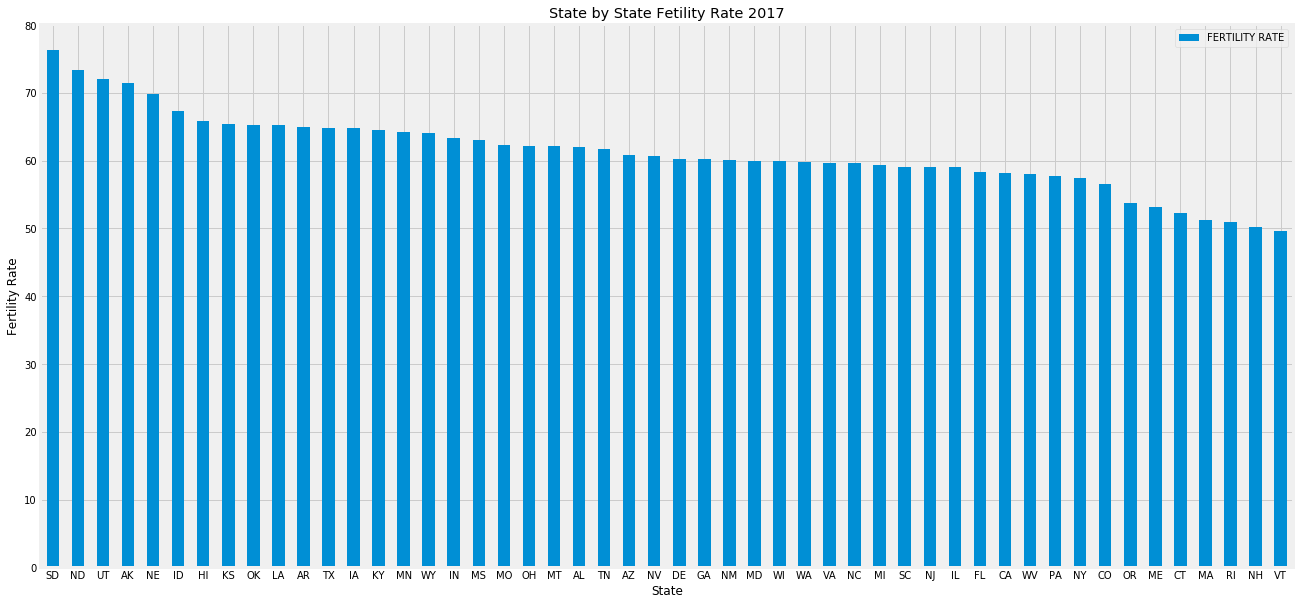

In [40]:
#Here I am plotting the state fertility rate in 2017 via a bar graph

ax = state_fertility[sf_2017].sort_values('FERTILITY RATE', ascending = False).plot.bar(x='STATE', y='FERTILITY RATE', rot=0, figsize=(20,10))
plt.ylabel("Fertility Rate")
plt.xlabel("State")
plt.title("State by State Fetility Rate 2017");

#### Brief Observations

South Dakota, North Dakota, and Utah were the top three in fertility rate in 2017. Rhode Island, New Hampshire, and Vermont were the bottom three. 

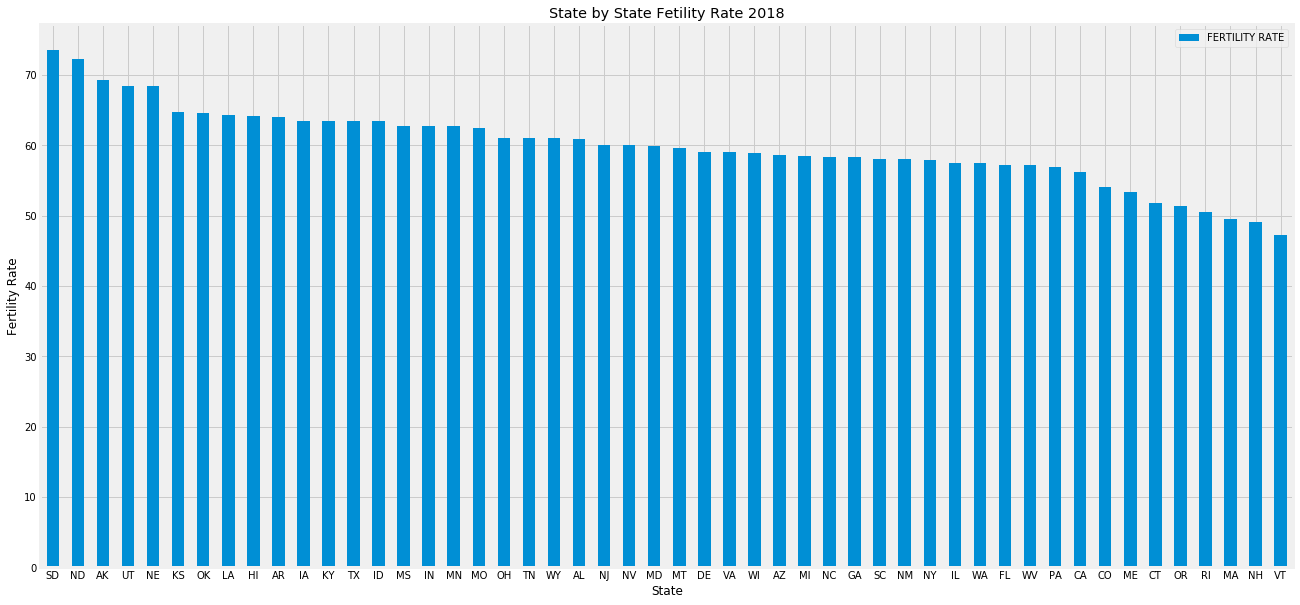

In [41]:
#Here I am plotting the state fertility rate in 2018

ax = state_fertility[sf_2018].sort_values('FERTILITY RATE', ascending = False).plot.bar(x='STATE', y='FERTILITY RATE', rot=0, figsize=(20,10))
plt.ylabel("Fertility Rate")
plt.xlabel("State")
plt.title("State by State Fetility Rate 2018");

#### Brief Observations

SD and ND remain the top two. New Hampsire and Vermont remain the bottom two.

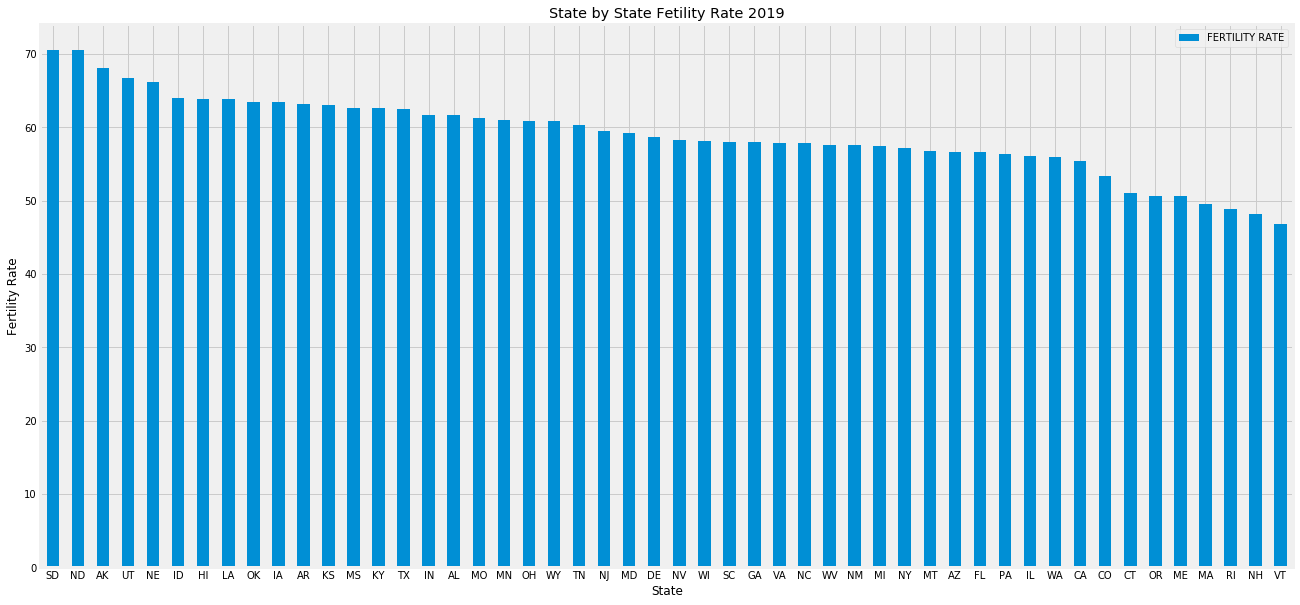

In [42]:
#Here I am plotting the state fertility rate in 2019


ax = state_fertility[sf_2019].sort_values('FERTILITY RATE', ascending = False).plot.bar(x='STATE', y='FERTILITY RATE', rot=0, figsize=(20,10))
plt.ylabel("Fertility Rate")
plt.xlabel("State")
plt.title("State by State Fetility Rate 2019");

#### Brief Observations

Essentially the same states remain at both the top and bottom for fertility rates. 

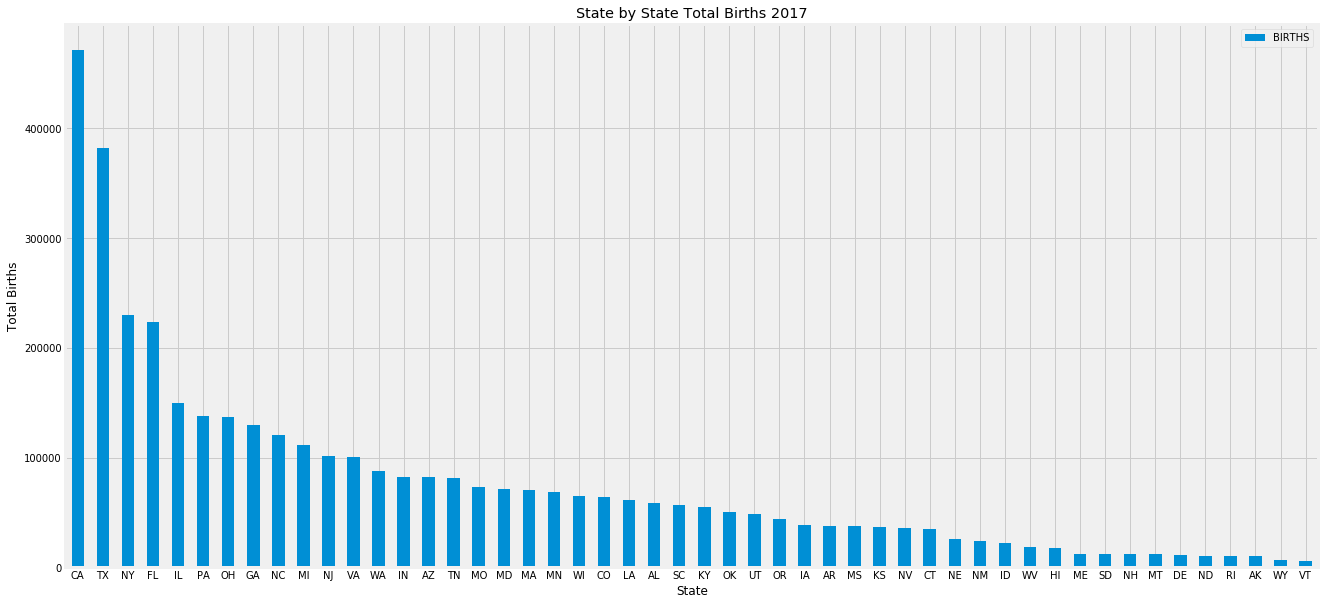

In [43]:
#Here I am now plotting total births, not fertility rate, for 2017

ax = state_fertility[sf_2017].sort_values('BIRTHS', ascending = False).plot.bar(x='STATE', y='BIRTHS', rot=0, figsize=(20,10))
plt.ylabel("Total Births")
plt.xlabel("State")
plt.title("State by State Total Births 2017");

#### Brief Observations

I believe this really highlights the difference between measuring things as a whole vs. per capita. California, Texas, New York, and Florida are the top four states in total births. That's likely because they are the top four most populous states in America. None of the top three states in fertility rate even make the top 15 in total births.

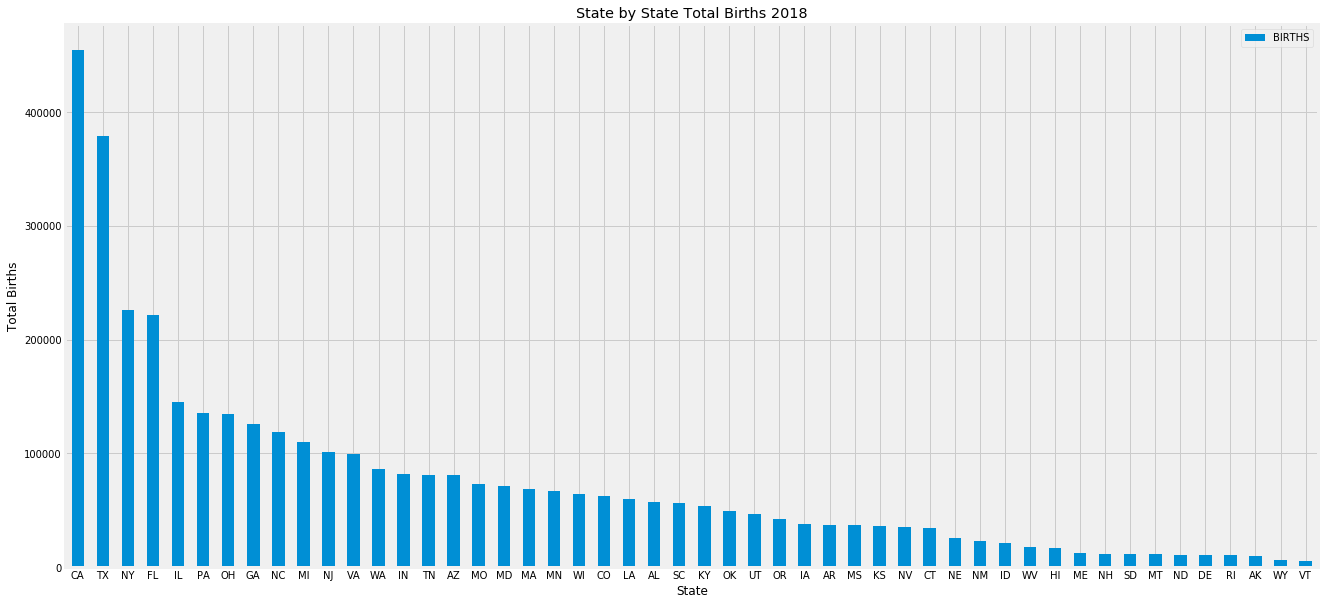

In [44]:
#Here I am now plotting total births, not fertility rate, for 2018

ax = state_fertility[sf_2018].sort_values('BIRTHS', ascending = False).plot.bar(x='STATE', y='BIRTHS', rot=0, figsize=(20,10))
plt.ylabel("Total Births")
plt.xlabel("State")
plt.title("State by State Total Births 2018");

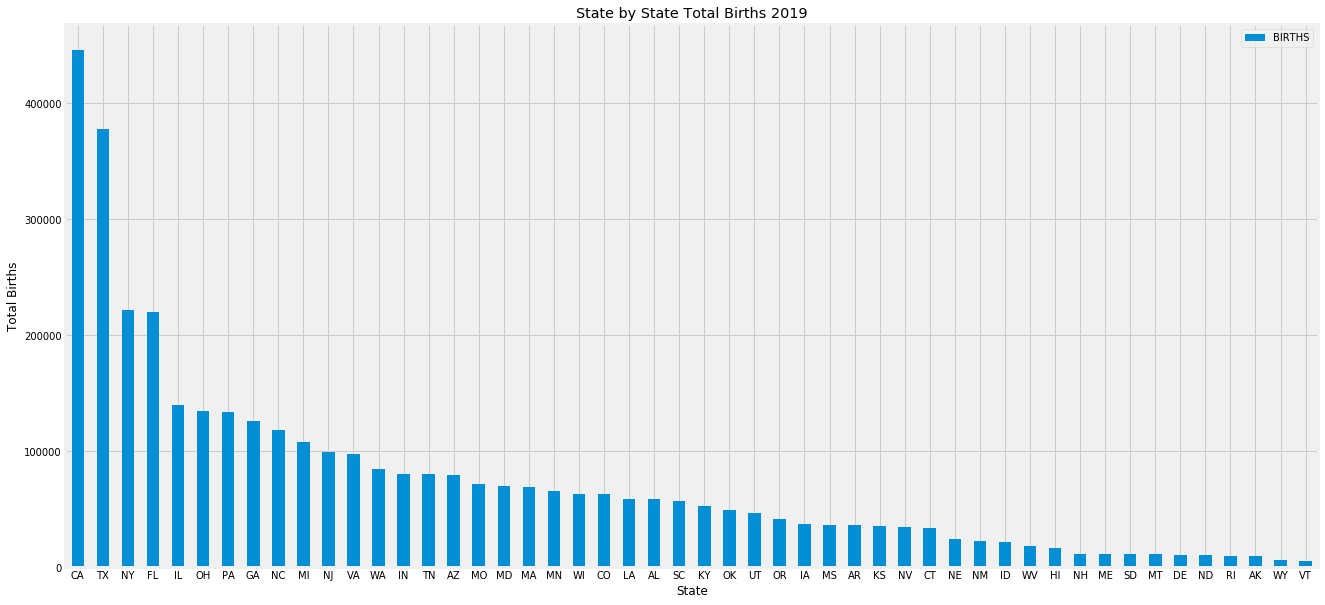

In [45]:
#Here I am now plotting total births, not fertility rate, for 2019

ax = state_fertility[sf_2019].sort_values('BIRTHS', ascending = False).plot.bar(x='STATE', y='BIRTHS', rot=0, figsize=(20,10))
plt.ylabel("Total Births")
plt.xlabel("State")
plt.title("State by State Total Births 2019");

#### Uses For Ultrasounds

Although ultrasound use is heavily associated with pregnancy, I wanted to double check other uses to make sure there were other patterns that might explain state level interest in searching for "ultrasound" on Google.

Ultrasound imaging has many uses for confirmation, diagnosis, and treatment of medical conditions. Some of these include:

•Pregnancy: Ultrasounds can help determine a due date or reveal the presence of multiple children, but they can also detect potential birth defects, placental issues, and other problems before birth.

•Diagnostics: Doctors can use ultrasounds to diagnose conditions, including those in the heart, blood vessels, liver, gallbladder, spleen, pancreas, kidneys, bladder, uterus, ovaries, eyes, thyroid, and testicles. Ultrasound waves do not transmit well through dense bones or parts of the body that hold air or gas, however, such as the bowel.

•Pelvic scans: May be performed if a woman is suffering pelvic pain or has abnormal periods, fibroids, cysts or other conditions associated with the female reproductive system

•Therapeutic applications: Ultrasounds can be used to detect and treat soft-tissue injuries.

#### Heart Disease Rate per State

It looks like ultrasounds are also used for detecting heart problems. The CDC has data on heart disease rate and deaths from heart disease per state. I gathered data from 2017-2019 (2020 not available)

In [46]:
#Here I am importing the dataset into Jupyter Notebook

heart_disease = pd.read_csv('state_heart_disease_data.csv')

In [47]:
#Here are the first few rows of data

heart_disease.head()

,YEAR,STATE,RATE,DEATHS
0,2019,AL,219.6,13448
1,2019,AK,129.7,843
2,2019,AZ,134.0,12587
3,2019,AR,226.5,8669
4,2019,CA,136.9,62394


In [48]:
#Here are the last few rows of data

heart_disease.tail()

,YEAR,STATE,RATE,DEATHS
145,2017,VA,154.5,14861
146,2017,WA,138.8,11582
147,2017,WV,192.0,4849
148,2017,WI,157.6,11860
149,2017,WY,148.9,1001


In [49]:
#Here are some summary statistics regarding heart disease in the United States

#The average rate is 164 and the average amount of deaths per state is 13,054.

#The most amount of deaths for one state in a single year was 62,797

heart_disease.describe()

,YEAR,RATE,DEATHS
count,150.000000,150.000000,150.000000
mean,2018.000000,164.498000,13054.086667
std,0.819232,28.186108,13334.086962
min,2017.000000,116.700000,814.000000
25%,2017.000000,145.100000,3550.250000
50%,2018.000000,158.150000,9506.000000
75%,2019.000000,180.225000,14986.750000
max,2019.000000,237.200000,62797.000000


In [50]:
#Here I am converting the DEATHS variable to an integer value so I can perform proper analyis

heart_disease['DEATHS'] = heart_disease['DEATHS'].astype(int)

In [51]:
#Here I am separating the heart disease data out by year to make visualization easier

hd_2017 = heart_disease["YEAR"] == 2017
hd_2018 = heart_disease["YEAR"] == 2018
hd_2019 = heart_disease["YEAR"] == 2019

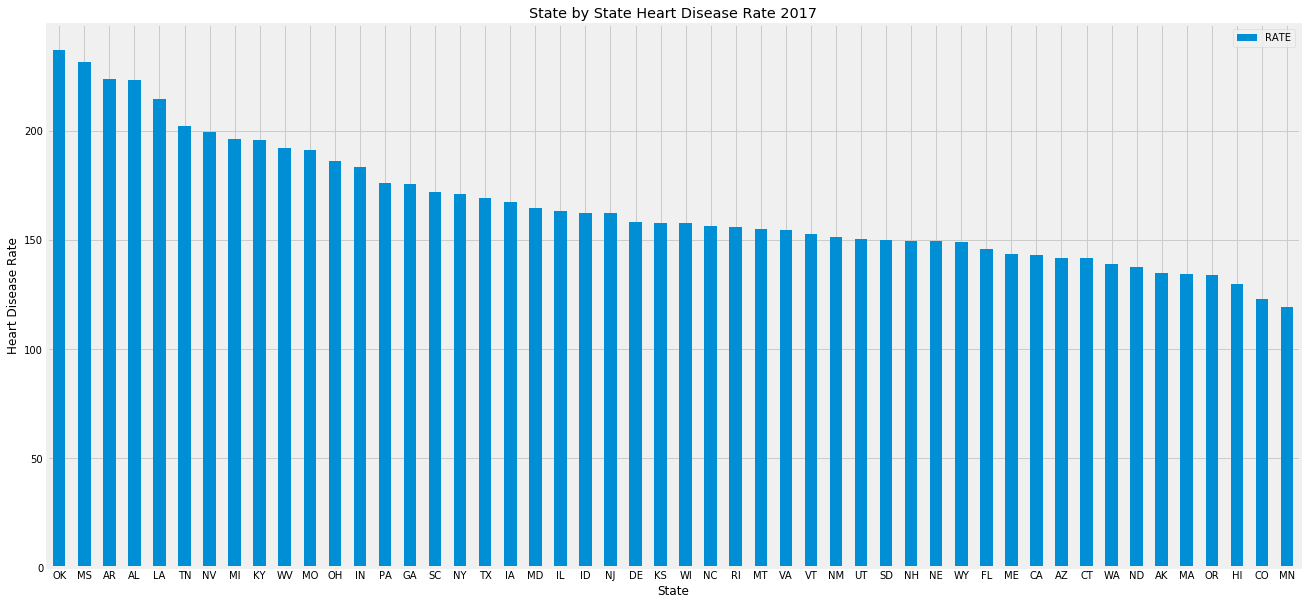

In [52]:
#Here I am plotting the heart disease rate per state in 2017

ax = heart_disease[hd_2017].sort_values('RATE', ascending = False).plot.bar(x='STATE', y='RATE', rot=0, figsize=(20,10))
plt.ylabel("Heart Disease Rate")
plt.xlabel("State")
plt.title("State by State Heart Disease Rate 2017");

#### Brief Observations

Oklahoma, Mississippi, and Arkansas had the highest rates of heart disease in 2017. Hawaii, Colorado, and Minnesota had the lowest.

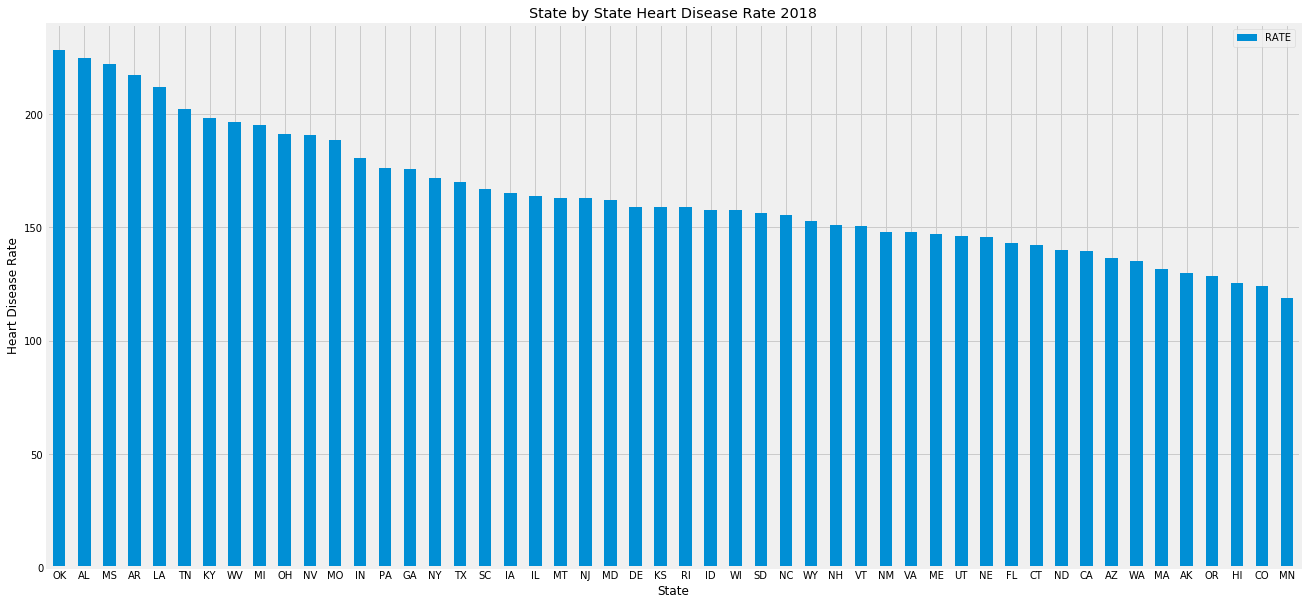

In [53]:
#Here I am plotting the heart disease rate per state in 2018

ax = heart_disease[hd_2018].sort_values('RATE', ascending = False).plot.bar(x='STATE', y='RATE', rot=0, figsize=(20,10))
plt.ylabel("Heart Disease Rate")
plt.xlabel("State")
plt.title("State by State Heart Disease Rate 2018");

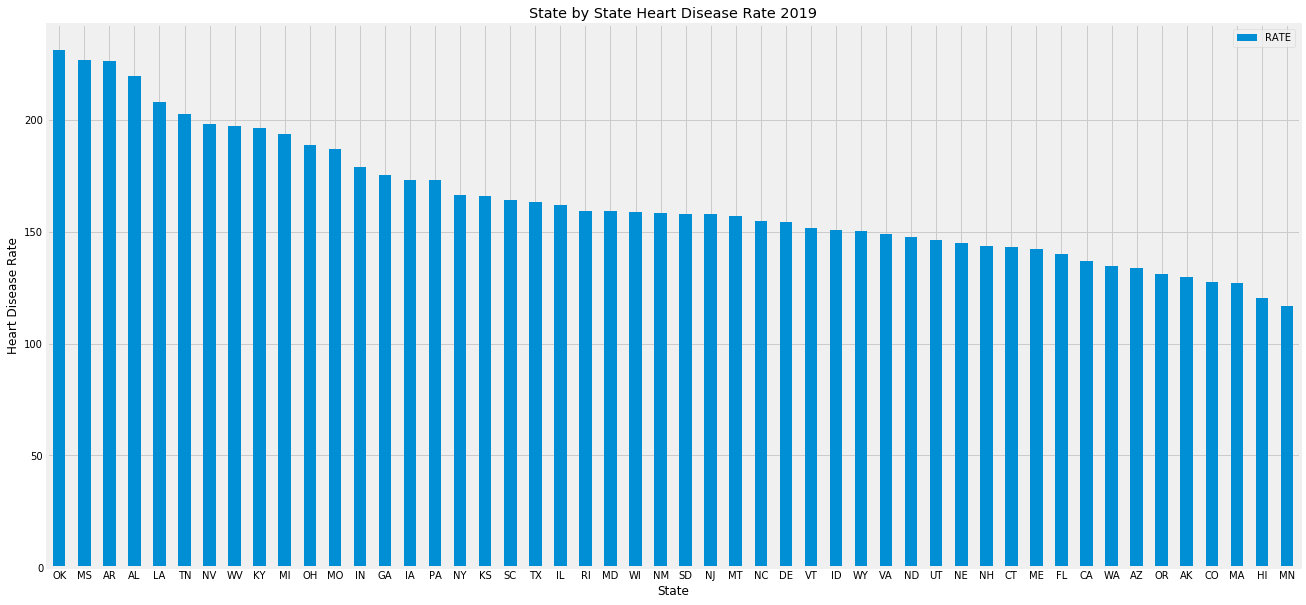

In [54]:
#Here I am plotting the heart disease rate per state in 2019

ax = heart_disease[hd_2019].sort_values('RATE', ascending = False).plot.bar(x='STATE', y='RATE', rot=0, figsize=(20,10))
plt.ylabel("Heart Disease Rate")
plt.xlabel("State")
plt.title("State by State Heart Disease Rate 2019");

#### Brief Observations

Not really any significant changes in heart disease rates between 2017-2019.

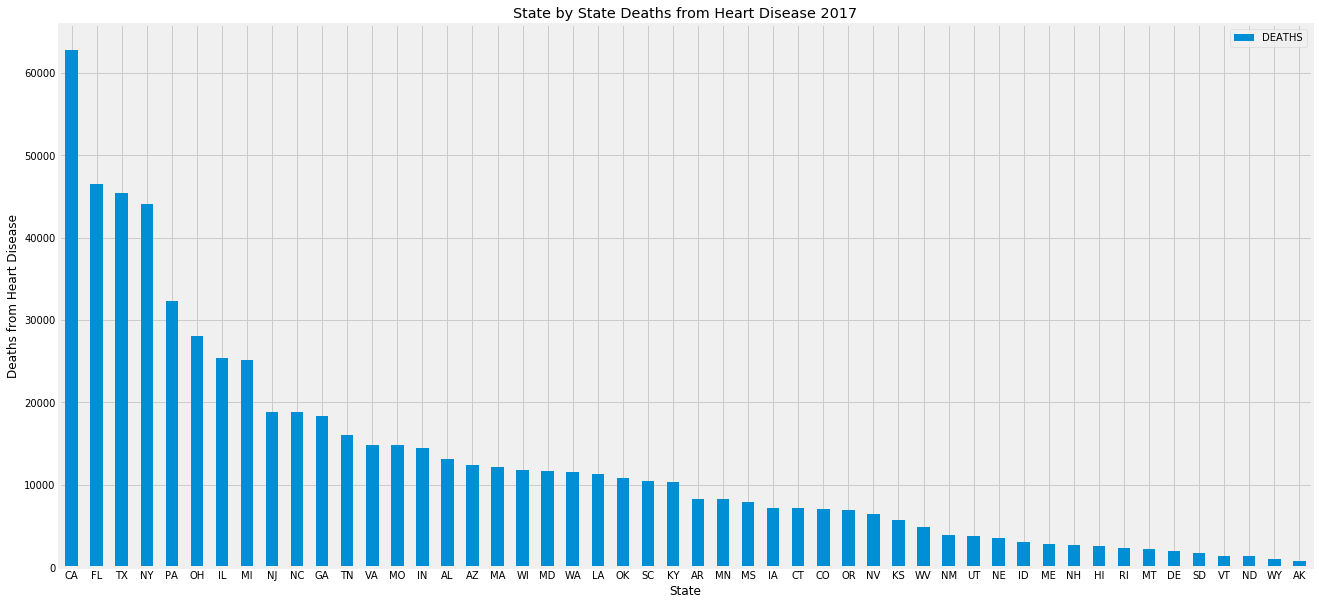

In [55]:
#Here I am plotting the amount of deaths from heart disease per state in 2017

ax = heart_disease[hd_2017].sort_values('DEATHS', ascending = False).plot.bar(x='STATE', y='DEATHS', rot=0, figsize=(20,10))
plt.ylabel("Deaths from Heart Disease")
plt.xlabel("State")
plt.title("State by State Deaths from Heart Disease 2017");

#### Brief Observations

Like the analysis above with birth rates vs. total births, measuring heart disease rates vs. total deaths shows the difference in magnitude from measuring things as a whole vs. per capita. The states with the most deaths from heart disease are California, Florida, Texas, and New York.

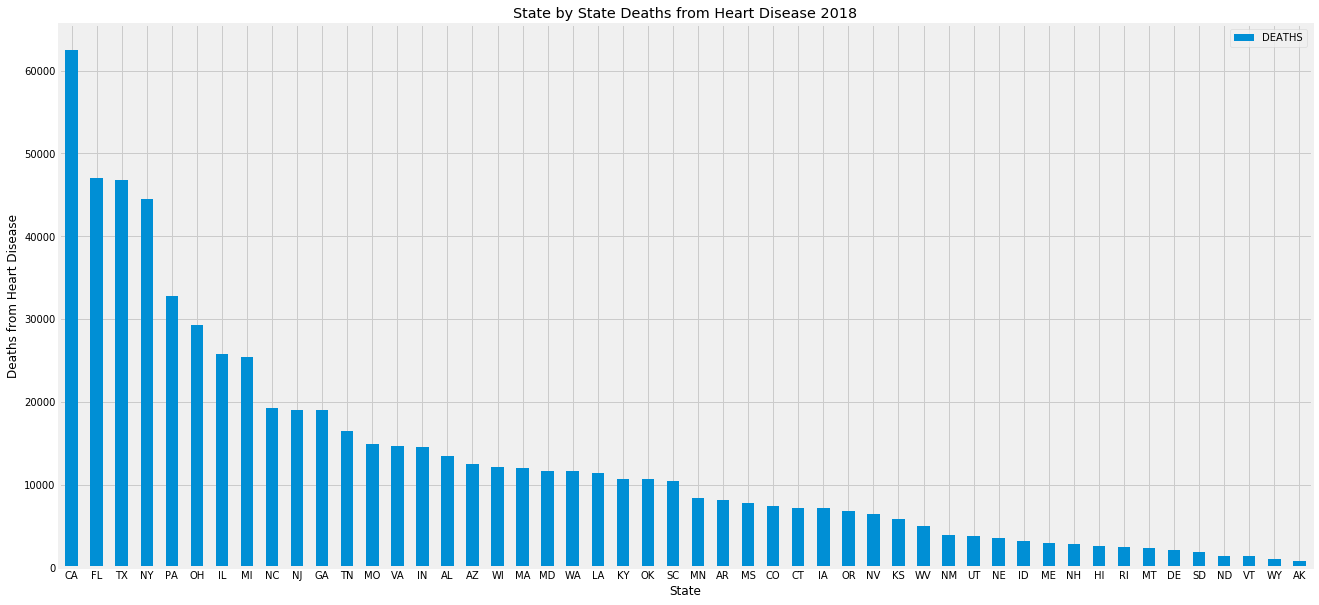

In [56]:
#Here I am plotting the amount of deaths from heart disease per state in 2018

ax = heart_disease[hd_2018].sort_values('DEATHS', ascending = False).plot.bar(x='STATE', y='DEATHS', rot=0, figsize=(20,10))
plt.ylabel("Deaths from Heart Disease")
plt.xlabel("State")
plt.title("State by State Deaths from Heart Disease 2018");

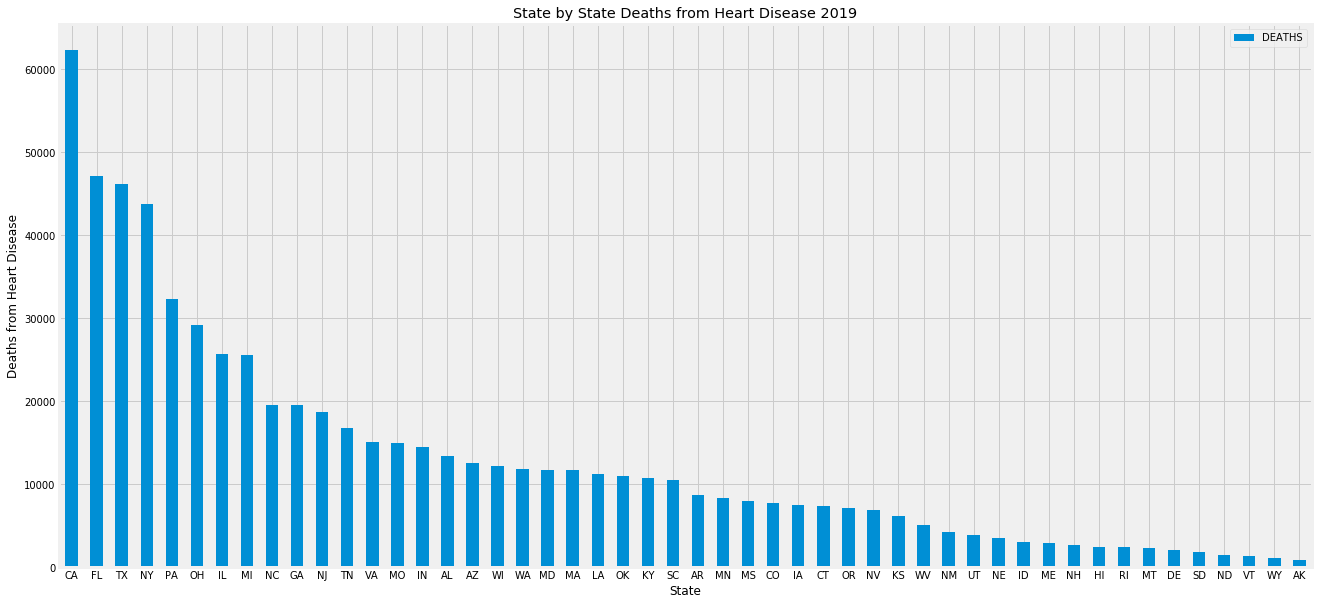

In [57]:
#Here I am plotting the amount of deaths from heart disease per state in 2019

ax = heart_disease[hd_2019].sort_values('DEATHS', ascending = False).plot.bar(x='STATE', y='DEATHS', rot=0, figsize=(20,10))
plt.ylabel("Deaths from Heart Disease")
plt.xlabel("State")
plt.title("State by State Deaths from Heart Disease 2019");

# Basic Data Analysis

#### Is there a relationship between state birth rate and state level interest in ultrasound?

Based on the eyeball test it did not seem like there was a significant relationship between state level interest in search term "ultrasound" and birth rates or heart disease rates. However, I figure it's a good idea to at least formally measure their relationship.

In [58]:
#Here I am separating 2017 data from the state interest dataset 

interest_2017 = state_ultrasound[df_2017]

In [59]:
#Here I am sorting the newly created dataset by state name to make it easier for future combining of datasets

interest_2017.sort_values(by=['State'], inplace=True)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
#Here is what the 2017 dataset looks like

interest_2017.head()

,State,Interest,Year
24,AK,70,2017
10,AL,76,2017
16,AR,73,2017
11,AZ,76,2017
22,CA,71,2017


In [61]:
#I am removing "Year" from the dataset to make it easier for future combinations

interest_2017 = interest_2017[['State', 'Interest']]

In [62]:
#Here I am setting the index to 'State' since I will join it with another dataset with 'State' as it's index

interest_2017 = interest_2017.set_index('State')

In [63]:
#Here is what the 2017 dataset looks like now

interest_2017.head()

,Interest
State,
AK,70
AL,76
AR,73
AZ,76
CA,71


In [64]:
#Here I am creating the 2017 dataset for fertility rates, which I will combine with state interest

birth_2017 = state_fertility[sf_2017]

In [65]:
#Here is what the 2017 birth rate dataset looks like

birth_2017.head()

,YEAR,STATE,FERTILITY RATE,BIRTHS
100,2017,AL,62.0,58941
101,2017,AK,71.5,10445
102,2017,AZ,60.8,81872
103,2017,AR,65.0,37520
104,2017,CA,58.2,471658


In [66]:
#Here I am sorting the birth rate dataset by 'State' to make it easier for combination

birth_2017.sort_values(by=['STATE'], inplace=True)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
#What it looks like now

birth_2017.head()

,YEAR,STATE,FERTILITY RATE,BIRTHS
101,2017,AK,71.5,10445
100,2017,AL,62.0,58941
103,2017,AR,65.0,37520
102,2017,AZ,60.8,81872
104,2017,CA,58.2,471658


In [68]:
#here I am making the dataset simeple with just 'State' and 'Fertility Rate'

birth_2017 = birth_2017[['STATE', 'FERTILITY RATE']]

In [69]:
#What it looks like now

birth_2017.head()

,STATE,FERTILITY RATE
101,AK,71.5
100,AL,62.0
103,AR,65.0
102,AZ,60.8
104,CA,58.2


In [70]:
#Here I am indexing the dataset with 'State' to make it easier for combination

birth_2017 = birth_2017.set_index('STATE')

In [71]:
#What it looks like now

birth_2017.head()

,FERTILITY RATE
STATE,
AK,71.5
AL,62.0
AR,65.0
AZ,60.8
CA,58.2


In [72]:
#Here I am officially combining the state ultrasound interest dataset with the state fertility rate dataset

birth_vs_interest = pd.concat([birth_2017, interest_2017], axis=1, join='inner')

In [73]:
#What the new dataset looks like

birth_vs_interest.head()

,FERTILITY RATE,Interest
AK,71.5,70
AL,62.0,76
AR,65.0,73
AZ,60.8,76
CA,58.2,71


In [74]:
#Here I am finding the Pearson Correlation Coefficient between Fertility Rate and State Interest in Ultrasound

import scipy.stats

scipy.stats.pearsonr(birth_vs_interest['FERTILITY RATE'], birth_vs_interest['Interest'])

(0.18869054013354106, 0.1894117922363123)

In [75]:
#Here I am just confirming basic correlation between the Fertility Rate and State Interest

birth_vs_interest['FERTILITY RATE'].corr(birth_vs_interest['Interest'])

0.18869054013354097

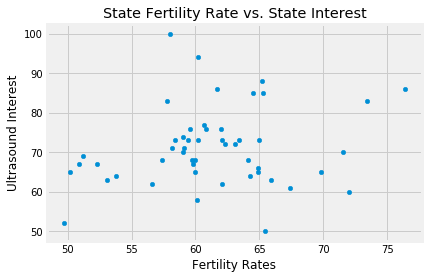

In [76]:
#Here I am creating a scatter plot to actually visualize the relationship between Fertility Rates and State Ultrasound Interest

ax = birth_vs_interest.plot(kind='scatter', x='FERTILITY RATE', y='Interest')
plt.ylabel("Ultrasound Interest")
plt.xlabel("Fertility Rates")
plt.title("State Fertility Rate vs. State Interest");

#### Brief Obervations

It looks like there is a weak positive correlation between state fertility rates and state level interest in the search term "ultrasound" on Google.

#### Is there a relationship between state heart disease rate and state level interest in ultrasound?

In [77]:
disease_2017 = heart_disease[hd_2017]

In [78]:
#Here I am sorting the newly created dataset by state name to make it easier for future combining of datasets

disease_2017.sort_values(by=['STATE'], inplace=True)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
#What it looks like now

disease_2017.head()

,YEAR,STATE,RATE,DEATHS
101,2017,AK,135.0,814
100,2017,AL,223.2,13110
103,2017,AR,223.8,8270
102,2017,AZ,141.9,12398
104,2017,CA,142.9,62797


In [80]:
#here I am making the dataset simeple with just 'State' and 'Fertility Rate'

disease_2017 = disease_2017[['STATE', 'RATE']]

In [81]:
#What it looks like now

disease_2017.head()

,STATE,RATE
101,AK,135.0
100,AL,223.2
103,AR,223.8
102,AZ,141.9
104,CA,142.9


In [82]:
#Here I am indexing the dataset with 'State' to make it easier for combination

disease_2017 = disease_2017.set_index('STATE')

In [83]:
#What it looks like now

disease_2017.head()

,RATE
STATE,
AK,135.0
AL,223.2
AR,223.8
AZ,141.9
CA,142.9


In [84]:
#Here I am officially combining the state ultrasound interest dataset with the state fertility rate dataset

disease_vs_interest = pd.concat([disease_2017, interest_2017], axis=1, join='inner')

In [85]:
#What the new dataset looks like

disease_vs_interest.head()

,RATE,Interest
AK,135.0,70
AL,223.2,76
AR,223.8,73
AZ,141.9,76
CA,142.9,71


In [86]:
#Here I am finding the Pearson Correlation Coefficient between Fertility Rate and State Interest in Ultrasound

scipy.stats.pearsonr(disease_vs_interest['RATE'], disease_vs_interest['Interest'])

(0.4714411672682086, 0.000548578911333619)

In [87]:
#Here I am just confirming basic correlation between the Fertility Rate and State Interest

disease_vs_interest['RATE'].corr(disease_vs_interest['Interest'])

0.47144116726820845

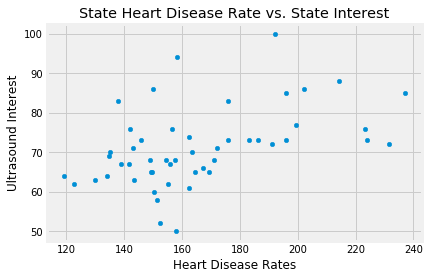

In [88]:
#Here is a scatter plot to actually visualize the relationship between Heart Disease Rates and State Ultrasound Interest

ax = disease_vs_interest.plot(kind='scatter', x='RATE', y='Interest')
plt.ylabel("Ultrasound Interest")
plt.xlabel("Heart Disease Rates")
plt.title("State Heart Disease Rate vs. State Interest");

# Top Related Searches to Ultrasound Per Year

In [89]:
top_ultrasound = pd.read_csv('Top_Related_Ultrasound.csv')

In [90]:
top_ultrasound.head()

,Top_Related_Search,Interest,Year
0,baby ultrasound,100,2017
1,pregnancy ultrasound,71,2017
2,3d ultrasound,71,2017
3,ultrasound technician,53,2017
4,what is ultrasound,49,2017


In [91]:
top_ultrasound.tail()

,Top_Related_Search,Interest,Year
95,ultrasound machine,19,2020
96,early ultrasound,18,2020
97,kidney ultrasound,18,2020
98,transvaginal ultrasound,17,2020
99,ultrasound school,17,2020


# Rising Related Searches to Ultrasound Per Year

In [92]:
rising_ultrasound = pd.read_csv('Rising_Related_Ultrasound.csv')

In [93]:
rising_ultrasound.head()

,Rising_Related_Searches,Percent_Increase,Year
0,3 month ultrasound,250%,2017
1,what is a 4d ultrasound,200%,2017
2,5d ultrasound,170%,2017
3,ultrasound technician schools near me,140%,2017
4,subchorionic hemorrhage,140%,2017


In [94]:
rising_ultrasound.tail()

,Rising_Related_Searches,Percent_Increase,Year
95,pocus ultrasound,60%,2020
96,what is an ultrasound,60%,2020
97,3d ultrasound cost,60%,2020
98,4d ultrasound near me,60%,2020
99,handheld ultrasound,60%,2020
